### Example 1: mean reversion trading signals

By setting `evaluate_plots=True`, the plot judge agent is triggered after the engineer generates a plot. First, an LLM analyzes the task context and generates domain-specific visual "priors" — expected features, values, and scientific constraints. The VLM then evaluates the generated plot against both these domain-specific criteria and general plotting standards, providing structured feedback and a verdict to either continue (triggering a feedback loop with the engineer agent) or retry. In this case, the plot passes evaluation and is returned to the user. 

In [2]:
import cmbagent
from PIL import Image

  
For a mean reversion trading strategy on PLTR stock, compute buy/sell signals at the points where the Z-score crosses below -1 or above +1.

Use yfinance data from 2022-01-01 to 2024-01-01 and work with Series, handling NaNs with df.dropna(inplace=True).

Plot the following: 
- PLTR price from (black line)
- 20-day rolling mean (gray dashed line)
- Shaded ±1 standard deviation bands (translucent gray fill)
- Buy signals (green upward triangles)
- Sell signals (red downward triangles)


--------------------------------------------------------------------------------

Calling engineer...

             Model    agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-4.1-2025-04-14 engineer 0.01367           1824               1253          3077
**Code Explanation:**

This code downloads daily PLTR stock data from Yahoo Finance for the period 2022-01-01 to 2024-01-01 using yfinance. It computes the 20-day rolling mean and standard deviation of the closing price, calculates the

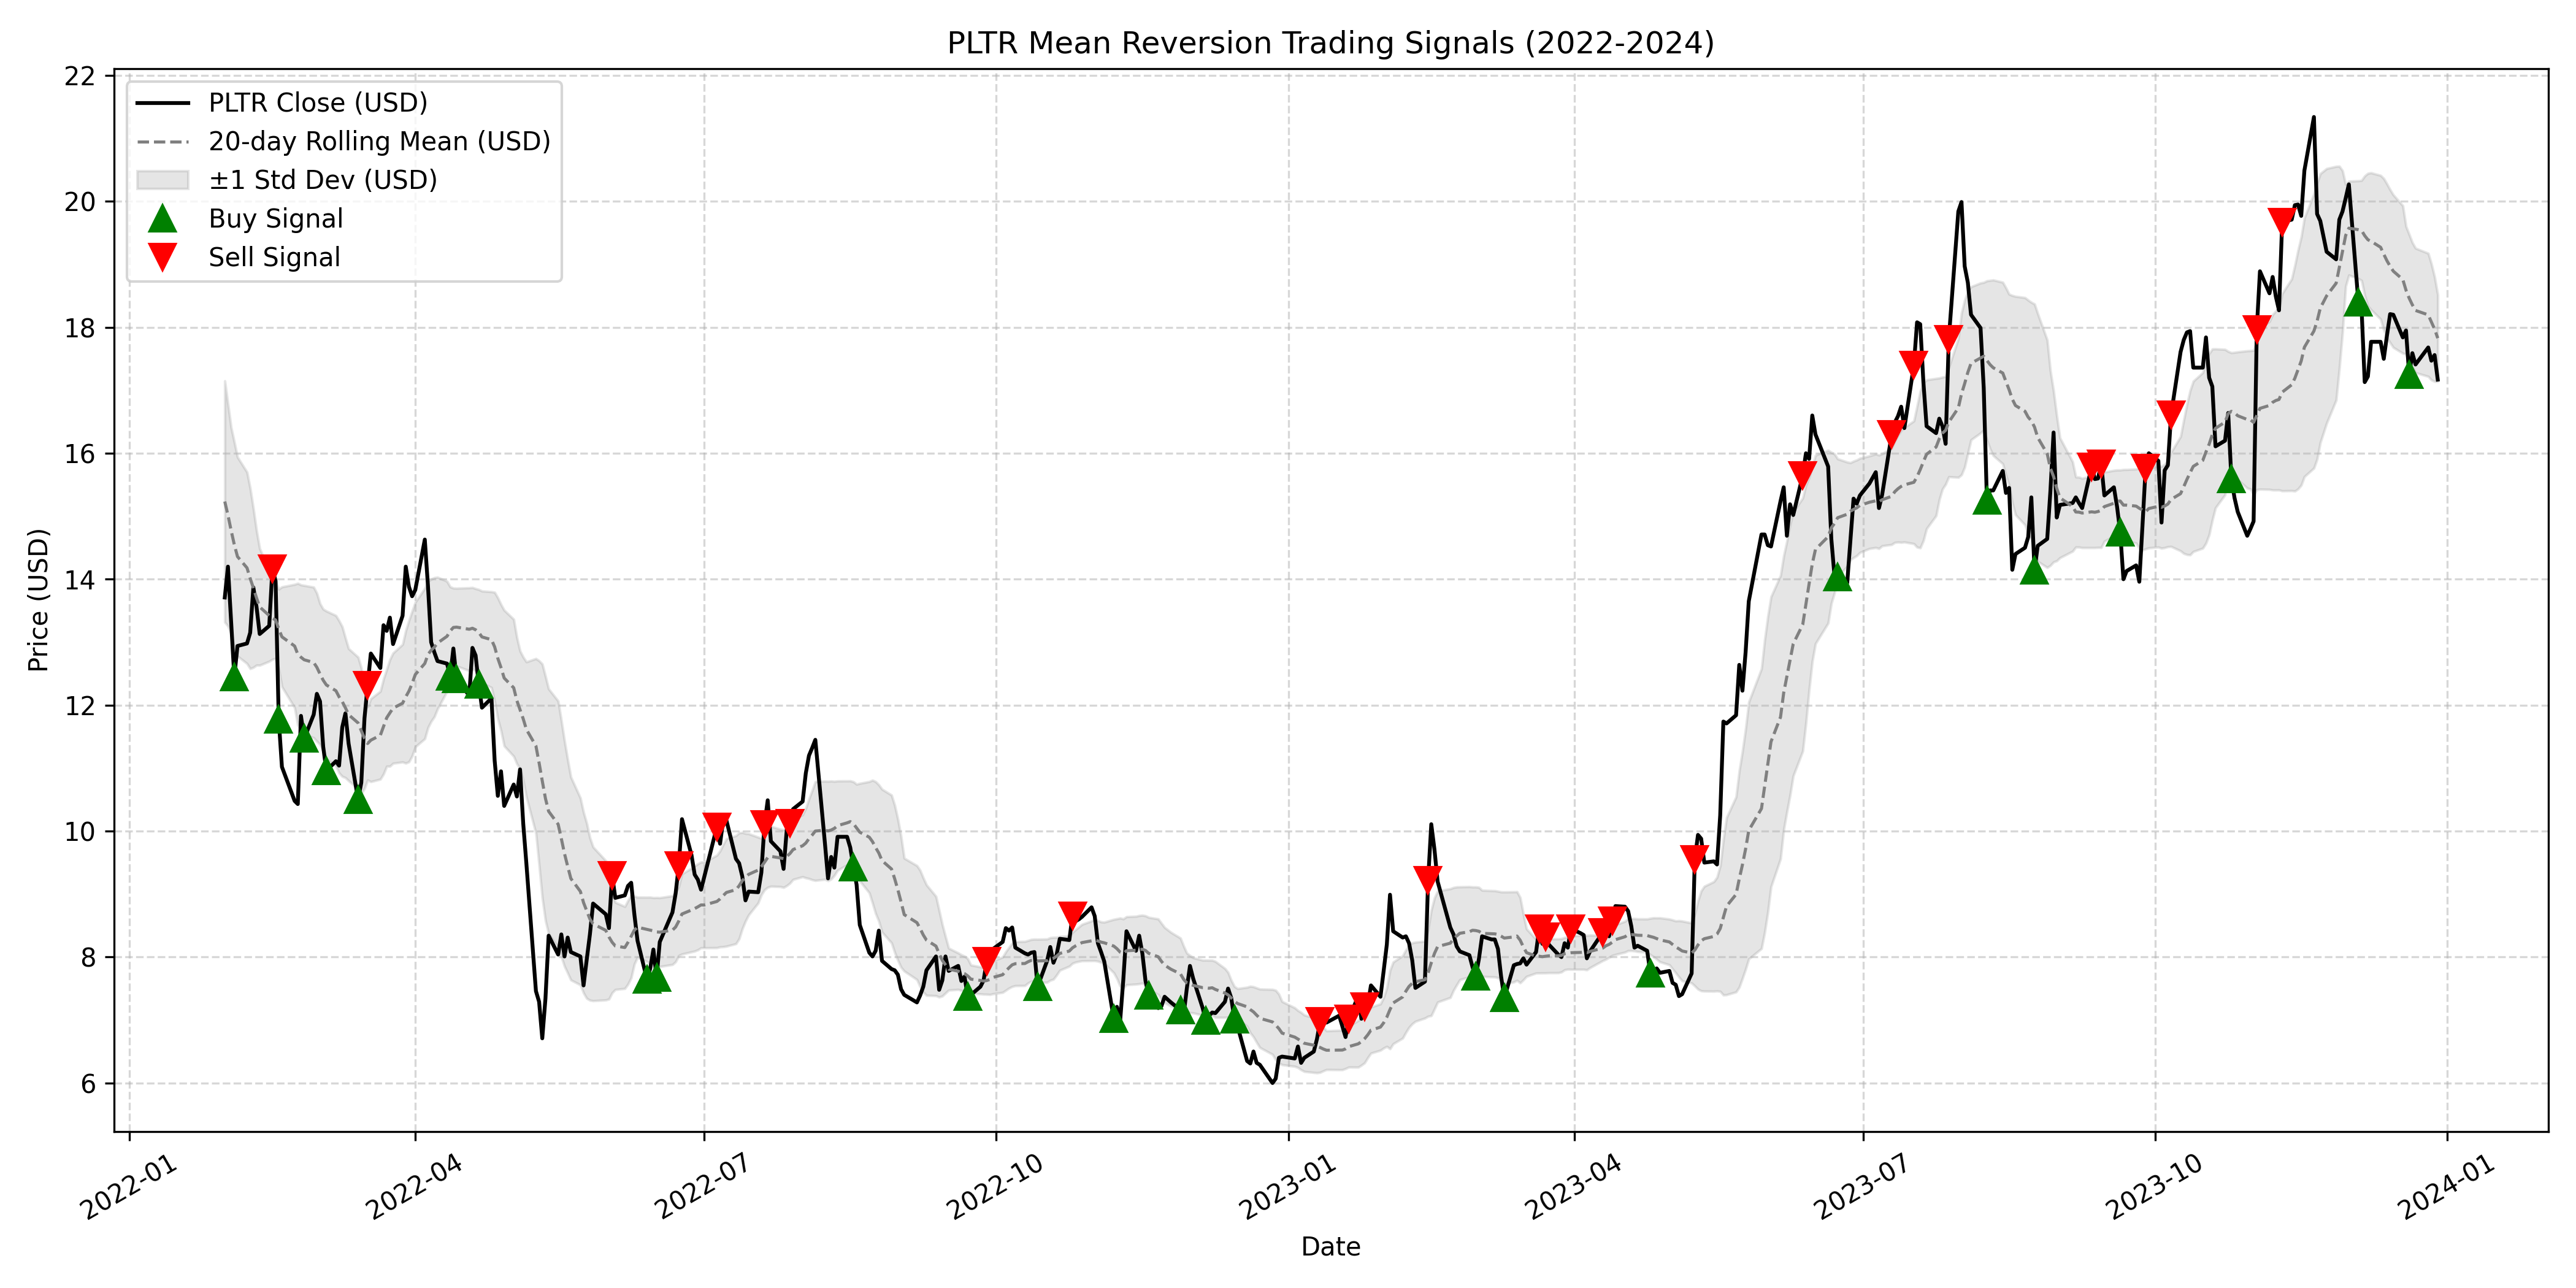

In [3]:
task= """  
For a mean reversion trading strategy on PLTR stock, compute buy/sell signals at the points where the Z-score crosses below -1 or above +1.

Use yfinance data from 2022-01-01 to 2024-01-01 and work with Series, handling NaNs with df.dropna(inplace=True).

Plot the following: 
- PLTR price from (black line)
- 20-day rolling mean (gray dashed line)
- Shaded ±1 standard deviation bands (translucent gray fill)
- Buy signals (green upward triangles)
- Sell signals (red downward triangles)
"""

result = cmbagent.one_shot(
    task=task,
    evaluate_plots=True,
)

final_img_path = result['final_context'].data['displayed_images'][-1]
Image.open(final_img_path)

### Example 2: CMB power spectra error

Once again, we set `evaluate_plots=True` to enable VLM feedback. To test the evaluation process, we *inject* a faulty plot for the VLM to assess. We replace the executed code with a vague template that hides the erroneous script. Since the amplitude scales roughly as $C_\ell^{TT} \propto A_s e^{-2\tau} $, the entire spectrum in our injected plot is damped (see cell below). The VLM notes that the amplitude of the acoustic peaks is inconsistent with Planck 2018 ΛCDM expectations and instructs the engineer to try again after verifying the values. The error is pinpointed, and the final plot is correct.

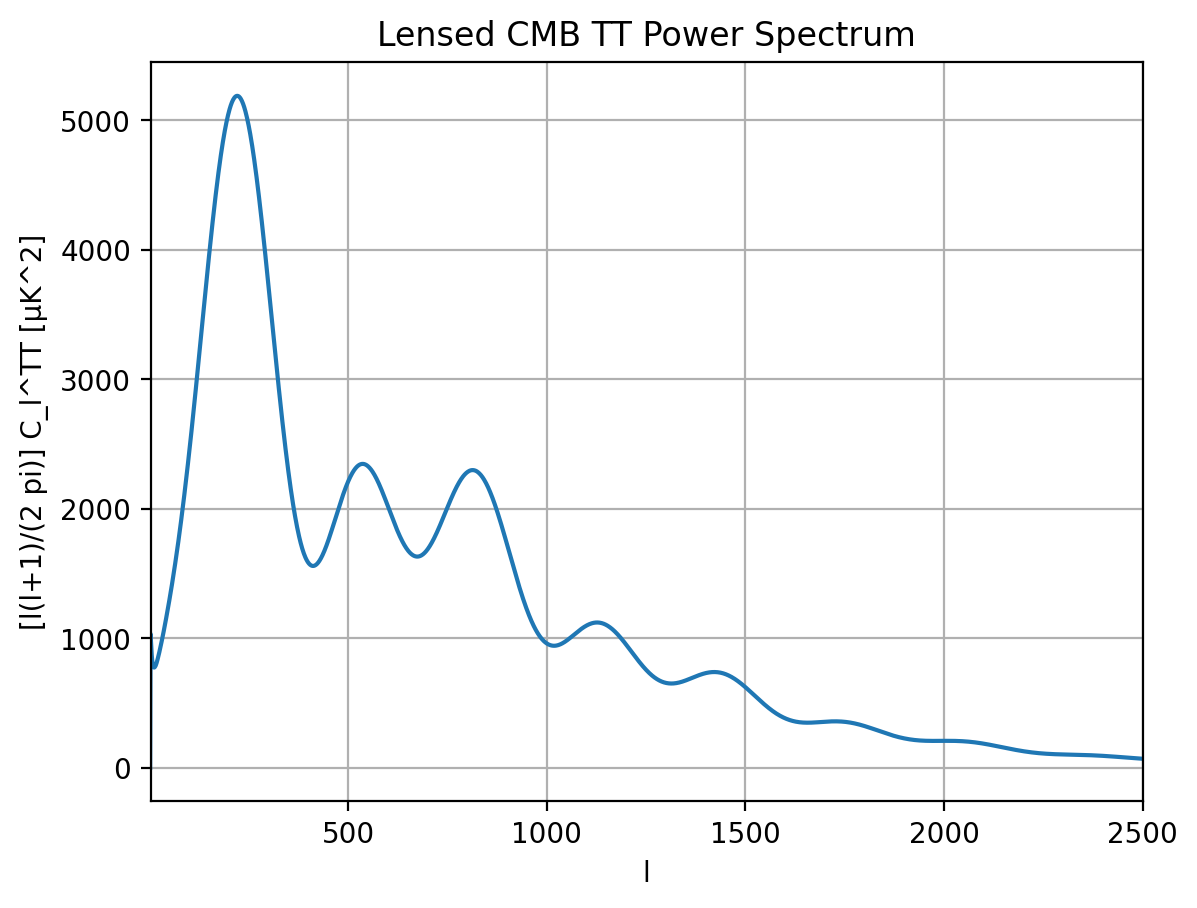

In [5]:
# Code to generate faulty plot

import camb
import numpy as np
import matplotlib.pyplot as plt
                                                                              # ↓ ERROR ↓
pars = camb.set_params(H0=67.36, ombh2=0.02237, omch2=0.1200, mnu=0.06, omk=0, tau=0.1044, As=2.100e-9, ns=0.9649, lmax=2500)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, raw_cl=False, CMB_unit='muK')
totCL = powers['total']  # Includes lensing
ls = np.arange(totCL.shape[0])
plt.figure(dpi=200)
plt.plot(ls, totCL[:, 0])
plt.xlim(2, 2500)
plt.xlabel('l')
plt.ylabel('[l(l+1)/(2 pi)] C_l^TT [μK^2]')
plt.title("Lensed CMB TT Power Spectrum")
plt.grid(True)
plt.show()

In [2]:
import cmbagent
from PIL import Image

  
Use the CAMB cosmology code to compute the lensed CMB TT power spectrum for Planck 2018 ΛCDM parameters. 
Plot the dimensionless total lensed TT spectrum for 2 <= l <= 2500 in μK². Use linear-linear axes.

Here's some skeleton code to follow:

# Imports

# Define cosmological parameters using Planck 2018
pars = camb.set_params(
    H0    = ___,
    ombh2 = ___,
    omch2 = ___,
    mnu   = ___,  # Neutrino mass (minimal normal hierarchy)
    omk   = ___,
    tau   = ___,
    As    = ___,
    ns    = ___,
    lmax  = ___,
)
# Run CAMB to get results

# Get the dictionary of CMB power spectra in μK^2
powers = results.get_cmb_power_spectra(pars, raw_cl=False, CMB_unit='muK')  # Returns l(l + 1)C_l / 2 pi

# Construct multipole array

# Plot total (lensed) temperature power spectrum

# Label plot


--------------------------------------------------------------------------------

Calling engineer...

             Model    agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-

/Users/kahaan/Downloads/cmbagent/cmbagent/../output/codebase/camb_cmb_tt_power_spectrum.py:64: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel("Dimensionless TT Power [$\mu$K$^2$]")


             Model      agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-4.1-2025-04-14 terminator 0.01124           5618                  1          5619

--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens |
|:----------------------------|------------:|--------------:|------------------:|-------------:|
| executor response formatter | $0.00678260 |          4954 |               303 |         5257 |
| plot judge                  | $0.02051150 |         11701 |               675 |        12376 |
| engineer response formatter | $0.01965700 |          3894 |              3494 |         7388 |
| terminator                  | $0.01124400 |          5618 |                 1 |         5619 |
| plot judge router           | $0.01060750

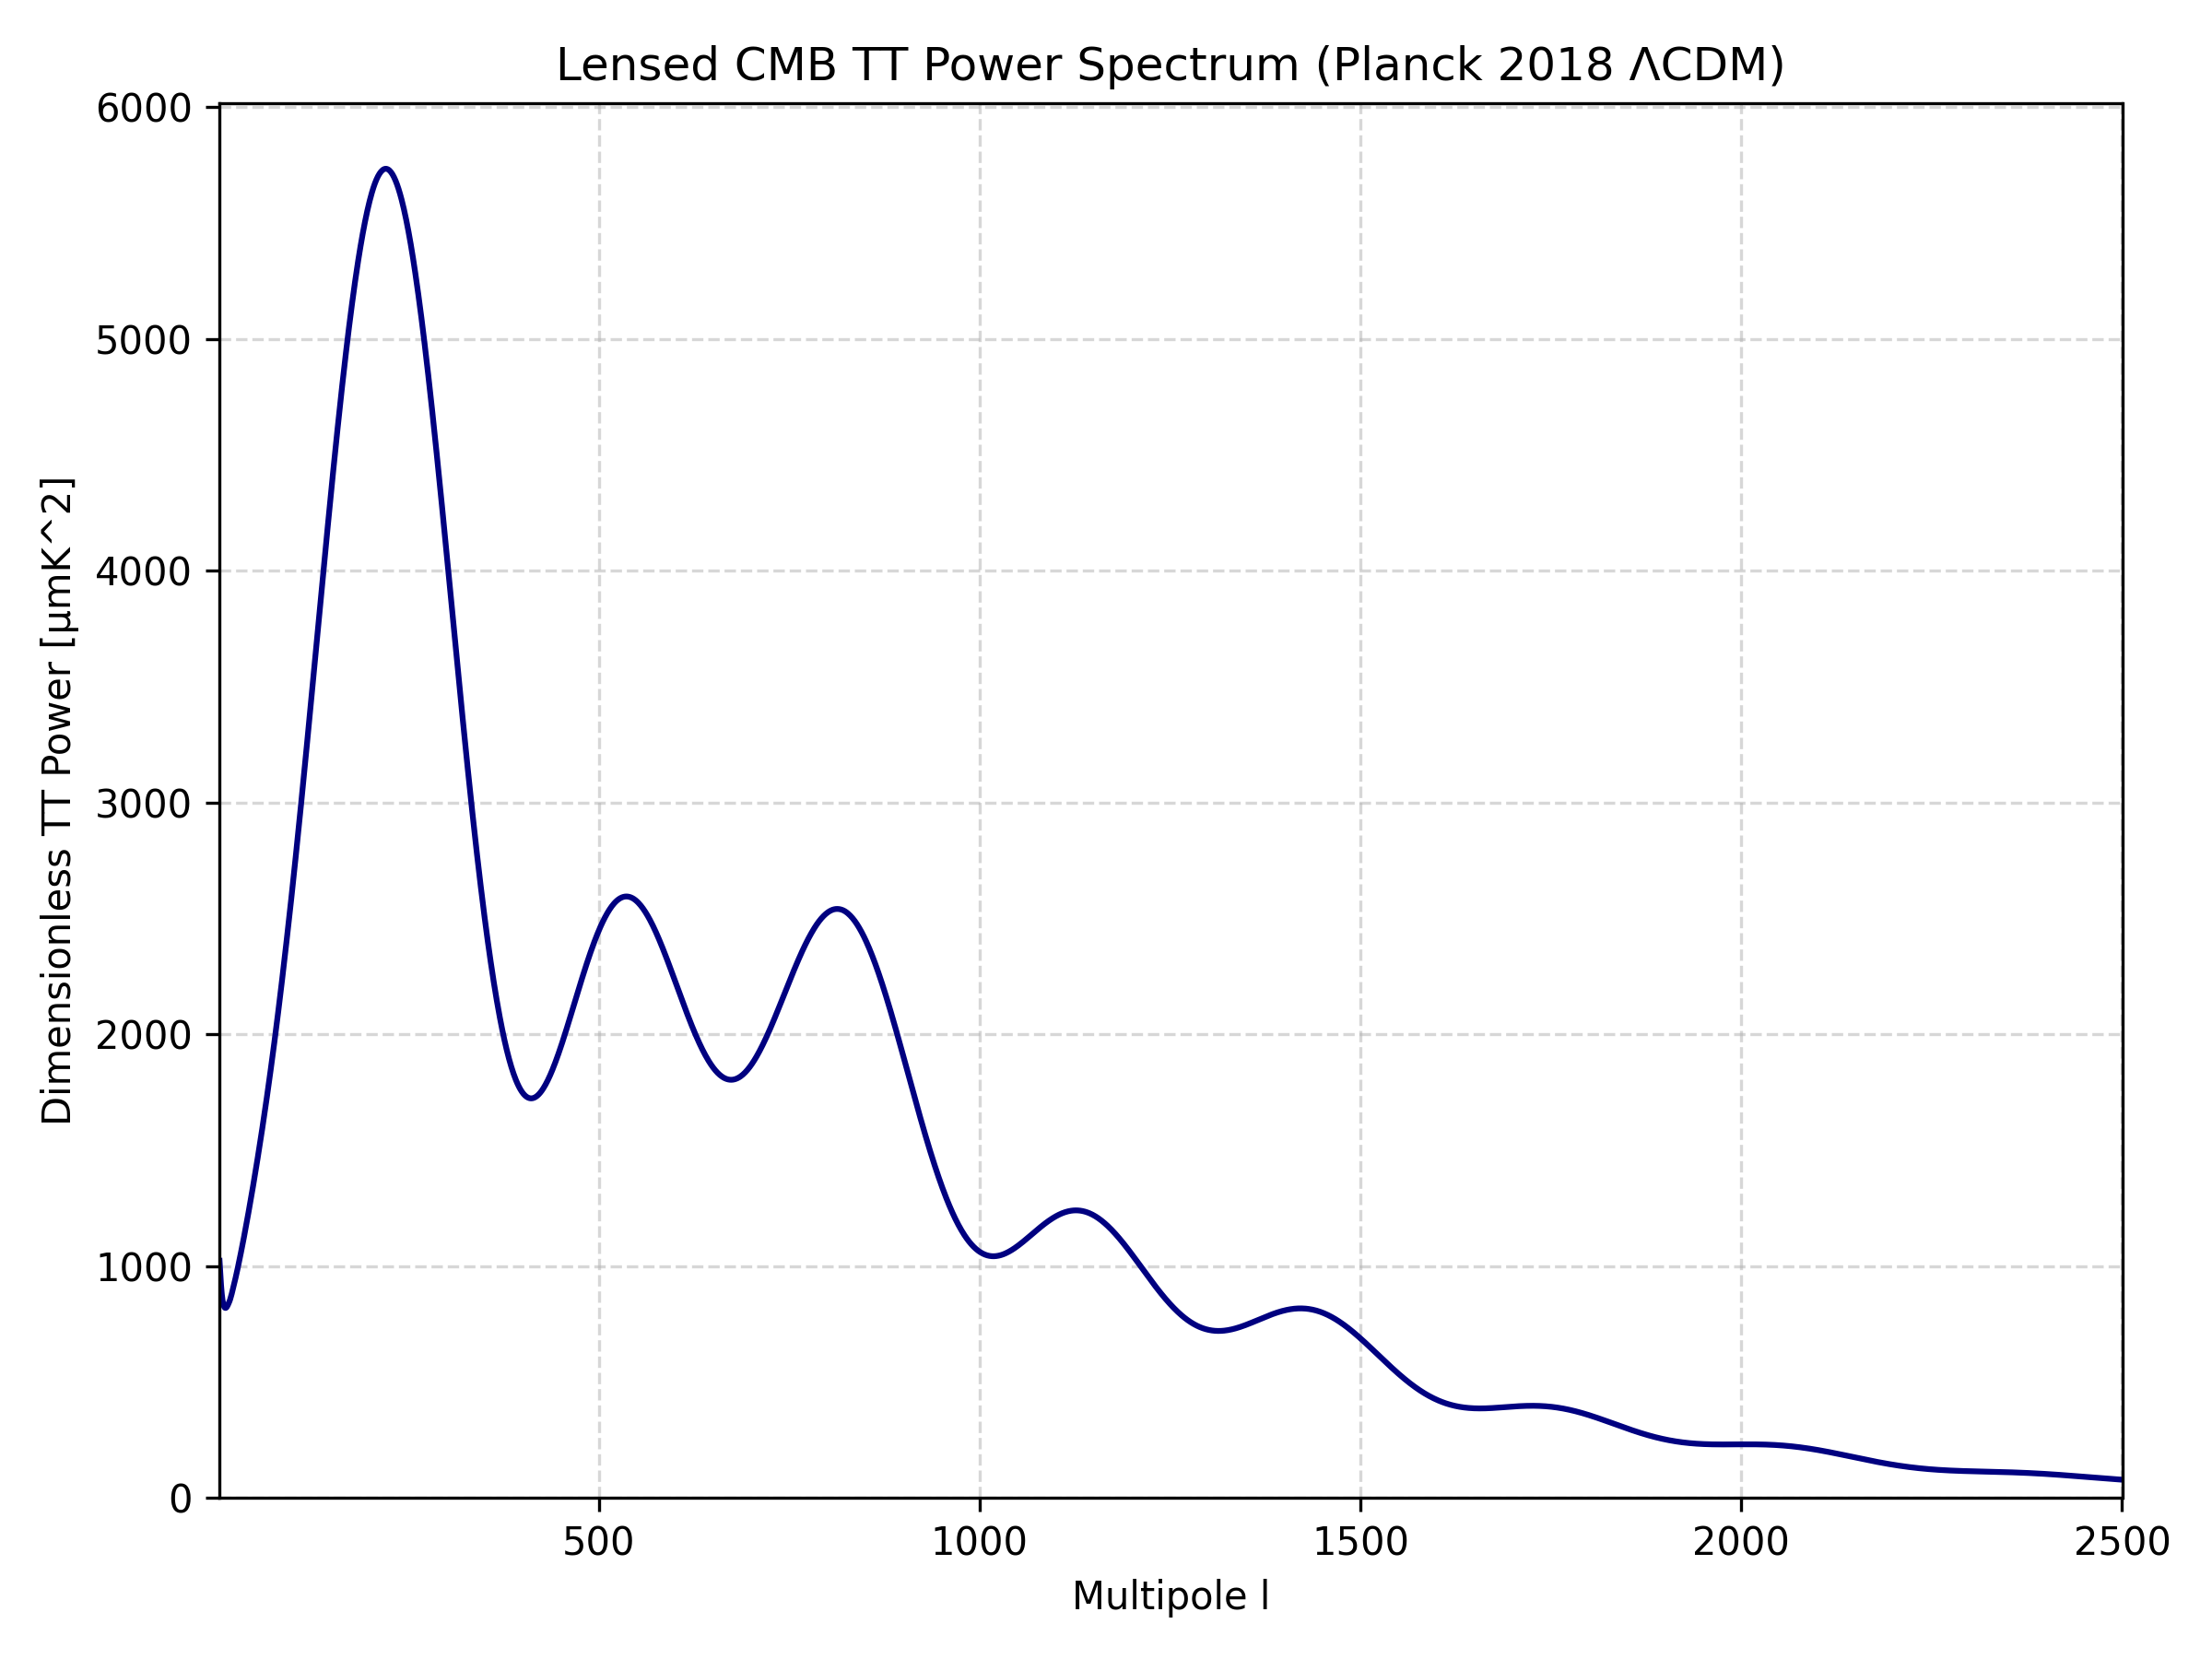

In [3]:
task= """  
Use the CAMB cosmology code to compute the lensed CMB TT power spectrum for Planck 2018 ΛCDM parameters. 
Plot the dimensionless total lensed TT spectrum for 2 <= l <= 2500 in μK². Use linear-linear axes.

Here's some skeleton code to follow:

# Imports

# Define cosmological parameters using Planck 2018
pars = camb.set_params(
    H0    = ___,
    ombh2 = ___,
    omch2 = ___,
    mnu   = ___,  # Neutrino mass (minimal normal hierarchy)
    omk   = ___,
    tau   = ___,
    As    = ___,
    ns    = ___,
    lmax  = ___,
)
# Run CAMB to get results

# Get the dictionary of CMB power spectra in μK^2
powers = results.get_cmb_power_spectra(pars, raw_cl=False, CMB_unit='muK')  # Returns l(l + 1)C_l / 2 pi

# Construct multipole array

# Plot total (lensed) temperature power spectrum

# Label plot
"""

result = cmbagent.one_shot(
    task=task,    
    evaluate_plots=True,
    max_n_plot_evals=1,
    inject_wrong_plot="wrong_optical_depth",
)

final_img_path = result['final_context'].data['displayed_images'][-1]
Image.open(final_img_path)